In [1]:


from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import shutil
import os
import h5py
import random
import datetime

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.manifold import TSNE



from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LinearRegression,Lasso,Ridge


#import seaborn as sns


import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.backend as K

from matplotlib import rcParams


from multiprocessing import Pool

from itertools import permutations


import h5py


## Function which constructs the point cloud
def so3_trans(xstart,error_sd):
    r=np.random.normal(1,error_sd)

    p1,p3,p2=np.random.uniform(low=0,high=2*np.pi,size=3)
    R1=np.array([[np.cos(p1),np.sin(p1),0],[-np.sin(p1),np.cos(p1),0],[0,0,1]])
    R2=np.array([[np.cos(p2),0,np.sin(p2)],[0,1,0],[-np.sin(p2),0,np.cos(p2)]])
    R3=np.array([[1,0,0],[0,np.cos(p3),np.sin(p3)],[0,-np.sin(p3),np.cos(p3)]])
    rr=np.matmul(np.matmul(R1,R2),R3)
    return r*np.matmul(rr,xstart)


In [2]:

def wiederholer_so3_3(w):
    global eps
    global delta
    global size
    global dim
    pca_objects=np.zeros((0,dim,dim))


    ### Step_2 ###
    t1,t2= np.random.choice(size, size=2, replace=False)
    t1=(t1+w)%size
    t2=(t2+w)%size
    basis=np.zeros((dim,dim))
    basis[0]=x3[t1]
    vector=x3[t2]
    vector=vector-np.dot(vector,basis[0])*basis[0]
    basis[1]=vector/np.linalg.norm(vector)
    for i in range(2,dim):
        vector=np.random.uniform(-1,1,size=dim)
        for j in range(i):
            vector=vector-np.dot(vector,basis[j])*basis[j]
        basis[i]=vector/np.linalg.norm(vector)

    basis_gen=basis
    p=np.arange(dim)
    i_dummy=p
    i1=i_dummy[0]
    i2=i_dummy[1]
    x_value=np.zeros((0,dim))          #variable für die LinearRegression
    y_value=np.zeros((0,dim))          #variable für die LinearRegression

    for j in (range(size)):
        if all(np.abs(np.dot(x3[j], basis_gen[i_dummy[i]]))<delta for i in range(2,dim)):    ### Step 3 ###
            for k in range(size):
                if all(np.abs(np.dot(x3[k], basis_gen[i_dummy[i]]))<delta for i in range(2,dim)): ### Step 3 ###
                    if 0<np.linalg.norm(x3[j]-x3[k])<eps:                                        ### Step 4 ###
                        if j!=k:
                            
                            
                            
                            
                                                   
                            
                            x_value_dummy=np.linalg.norm(x3[k]-x3[j])*x3[j]/np.linalg.norm(x3[j])
                            sign1=np.dot(x3[j],basis_gen[i1])*np.dot(x3[k],basis_gen[i2])
                            sign2=np.dot(x3[j],basis_gen[i2])*np.dot(x3[k],basis_gen[i1])
                            sign=np.sign(sign1-sign2) 
                            x_value_dummy=sign*x_value_dummy

                            x_value=np.append(x_value,x_value_dummy.reshape(1,dim),axis=0)
                            
                            y_value_dummy=np.array([x3[k]-x3[j]])
                            y_value=np.append(y_value,y_value_dummy,axis=0)
    
    ### Step 6 ###
    
    s=np.shape(x_value)[0]
    if s!=0:
        for j in i_dummy[2:]:
                for k in range(5*s):
                    x_value=np.append(x_value,basis_gen[j].reshape(1,dim),axis=0)    ### equation 15 ###
                    y_value=np.append(y_value,np.zeros((1,dim)),axis=0)              ### equation 15 ###
        reg = LinearRegression(fit_intercept=False).fit(x_value,y_value)   
        pca_objects=np.append(pca_objects,(reg.coef_).reshape(1,dim,dim),axis=0)
    return pca_objects,s

In [3]:
############# Running the first example for SO(3) from the Paper ############


dim=3
i_size=200
i_eps=0.3
i_delta=0.5
i_error=0.01

size=i_size
eps=i_eps
delta=i_delta
error=i_error

size1=i_size
eps1=i_eps
delta1=i_delta
error1=i_error


x3=np.zeros((size,dim))

for i in range(size):
    xstart=np.array(np.random.uniform(-1,1,dim))
    xstart=xstart/np.linalg.norm(xstart)
    xstart=so3_trans(xstart,error)
    x3[i]=xstart

    
b=np.arange(100)
pool = Pool()
vals = pool.imap(wiederholer_so3_3, b)
generators=np.zeros((0,dim,dim))
cnt=0
for i in vals:
    generators=np.append(generators,i[0],axis=0)
    cnt=cnt+i[1]
pool.close()

pca = PCA(n_components=dim*dim)
pcat1=pca.fit_transform(generators.reshape(len(generators),dim*dim))
print(np.round(np.sqrt(2.)*pca.components_[0],2).reshape(dim,dim))
print(np.round(np.sqrt(2.)*pca.components_[1],2).reshape(dim,dim))
print(np.round(np.sqrt(2.)*pca.components_[2],2).reshape(dim,dim))
print()                    
std_1=np.std(pcat1,axis=0)

[[ 0.    0.73  0.48]
 [-0.78 -0.01 -0.45]
 [-0.51  0.42  0.01]]
[[-0.    0.53 -0.05]
 [-0.53  0.02  0.82]
 [ 0.07 -0.87  0.01]]
[[ 0.09  0.4  -0.83]
 [-0.38 -0.01 -0.32]
 [ 0.89  0.29 -0.06]]



/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


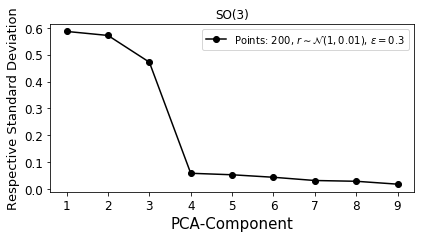

In [4]:
rcParams['text.usetex']=False
plt.plot(1+np.arange(9),std_1,c="black",marker="o",label="Points: "+str(size)+', $r\sim {\cal N}(1,$'+str(i_error)+'$)$, $\epsilon=$'+str(eps))
#plt.title('The standard deviation of the components of the PCA')
plt.xlabel('PCA-Component',size=15)
plt.ylabel('Respective Standard Deviation',size=13)
plt.xticks(np.arange(1,10),size=12)
plt.yticks(size=12)
#plt.show()
plt.axes().set_aspect(6.5)
plt.tight_layout()
plt.legend()
plt.title('SO(3)')
#plt.savefig(directory+'so2_pca.pdf',bbox_inches='tight',dpi=500)
plt.show()

[[-0.04  0.55  0.38]
 [-0.74  0.02 -0.65]
 [-0.35  0.68  0.02]]
[[-0.08  0.17  0.77]
 [-0.2  -0.02  0.63]
 [-0.77 -0.58  0.09]]
[[ 0.04 -0.64  0.54]
 [ 0.82  0.01 -0.39]
 [-0.51  0.47 -0.02]]



/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


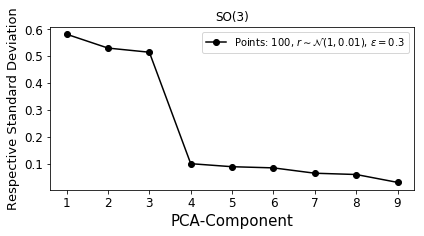

In [ ]:
############# Running the second example for SO(3) from the Paper ############



dim=3
i_size=100
i_eps=0.3
i_delta=0.5
i_error=0.01

size=i_size
eps=i_eps
delta=i_delta
error=i_error


size2=i_size
eps2=i_eps
delta2=i_delta
error2=i_error
x3=np.zeros((size,dim))

for i in range(size):
    xstart=np.array(np.random.uniform(-1,1,dim))
    xstart=xstart/np.linalg.norm(xstart)
    xstart=so3_trans(xstart,error)
    x3[i]=xstart

    
b=np.arange(100)
pool = Pool()
vals = pool.imap(wiederholer_so3_3, b)
generators2=np.zeros((0,dim,dim))
cnt=0
for i in vals:
    generators2=np.append(generators2,i[0],axis=0)
    cnt=cnt+i[1]
pool.close()

pca2 = PCA(n_components=dim*dim)
pcat2=pca2.fit_transform(generators2.reshape(len(generators2),dim*dim))
print(np.round(np.sqrt(2.)*pca2.components_[0],2).reshape(dim,dim))
print(np.round(np.sqrt(2.)*pca2.components_[1],2).reshape(dim,dim))
print(np.round(np.sqrt(2.)*pca2.components_[2],2).reshape(dim,dim))
print()                    
std_2=np.std(pcat2,axis=0)


rcParams['text.usetex']=False
plt.plot(1+np.arange(9),std_2,c="black",marker="o",label="Points: "+str(size)+', $r\sim {\cal N}(1,$'+str(i_error)+'$)$, $\epsilon=$'+str(eps))
#plt.title('The standard deviation of the components of the PCA')
plt.xlabel('PCA-Component',size=15)
plt.ylabel('Respective Standard Deviation',size=13)
plt.xticks(np.arange(1,10),size=12)
plt.yticks(size=12)
#plt.show()
plt.axes().set_aspect(6.5)
plt.tight_layout()
plt.legend()
plt.title('SO(3)')
#plt.savefig(directory+'so2_pca.pdf',bbox_inches='tight',dpi=500)
plt.show()

In [ ]:
############# Running the third example for SO(3) from the Paper ############


dim=3
i_size=1000
i_eps=0.3
i_delta=0.5
i_error=0.1

size=i_size
eps=i_eps
delta=i_delta
error=i_error
x3=np.zeros((size,dim))

for i in range(size):
    xstart=np.array(np.random.uniform(-1,1,dim))
    xstart=xstart/np.linalg.norm(xstart)
    xstart=so3_trans(xstart,error)
    x3[i]=xstart

    
b=np.arange(100)
pool = Pool()
vals = pool.imap(wiederholer_so3_3, b)
generators3=np.zeros((0,dim,dim))
cnt=0
for i in vals:
    generators3=np.append(generators3,i[0],axis=0)
    cnt=cnt+i[1]
pool.close()

pca3 = PCA(n_components=dim*dim)
pcat3=pca3.fit_transform(generators3.reshape(len(generators3),dim*dim))
print(np.round(np.sqrt(1.)*pca3.components_[0],2).reshape(dim,dim))
print(np.round(np.sqrt(1.)*pca3.components_[1],2).reshape(dim,dim))
print(np.round(np.sqrt(1.)*pca3.components_[2],2).reshape(dim,dim))
print()                    
std_3=np.std(pcat3,axis=0)


rcParams['text.usetex']=False
plt.plot(1+np.arange(9),std_3,c="black",marker="o",label="Points: "+str(size)+', $r\sim {\cal N}(1,$'+str(i_error)+'$)$, $\epsilon=$'+str(eps))
#plt.title('The standard deviation of the components of the PCA')
plt.xlabel('PCA-Component',size=15)
plt.ylabel('Respective Standard Deviation',size=13)
plt.xticks(np.arange(1,10),size=12)
plt.yticks(size=12)
#plt.show()
plt.axes().set_aspect(6.5)
plt.tight_layout()
plt.legend()
plt.title('SO(3)')
#plt.savefig(directory+'so2_pca.pdf',bbox_inches='tight',dpi=500)
plt.show()